<a href="https://colab.research.google.com/github/asheta66/CNN/blob/main/cnn_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training data:


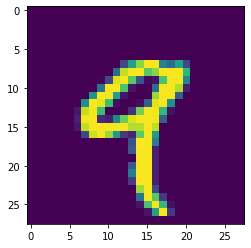

Label of this image is 3


In [135]:
#importing the necessary modules
from keras.datasets import mnist
import numpy as np

#loading data
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

#What mnist images look like
import matplotlib.pyplot as plt
print("Training data:")
plt.imshow(xtrain[4])
plt.show()
print("Label of this image is",ytrain[7])


In [136]:
#reshaping data as needed by the model
xtrain=np.reshape(xtrain,(-1,28,28,1))
xtest=np.reshape(xtest,(-1,28,28,1))
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [137]:
#normalising
x_train=xtrain/255
x_test=xtest/255

In [138]:
#implementing one hot encoding
from keras.utils.np_utils import to_categorical
y_train = to_categorical(ytrain, num_classes=10)
y_test = to_categorical(ytest, num_classes=10)

In [139]:
#importing the model
from keras.models import Sequential
#importing layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [140]:
#creating model object
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=10, activation='softmax')
])

In [141]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 3136)              0         
                                                                 
 dense_13 (Dense)            (None, 10)              

In [142]:
#compiling
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=["accuracy"])

Model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
#https://keras.io/api/models/model_training_apis/

In [143]:
#training the model
history = model.fit(x_train, y_train,
                              batch_size=1000,
                              epochs=10,
                              verbose=2,
                              steps_per_epoch=100,
                              validation_freq=1,
                              validation_data=(x_test, y_test))

Epoch 1/10
100/100 - 100s - loss: 0.2095 - accuracy: 0.9346 - val_loss: 0.0429 - val_accuracy: 0.9852 - 100s/epoch - 999ms/step
Epoch 2/10
100/100 - 96s - loss: 0.0388 - accuracy: 0.9884 - val_loss: 0.0318 - val_accuracy: 0.9886 - 96s/epoch - 956ms/step
Epoch 3/10
100/100 - 97s - loss: 0.0265 - accuracy: 0.9916 - val_loss: 0.0308 - val_accuracy: 0.9899 - 97s/epoch - 970ms/step
Epoch 4/10
100/100 - 97s - loss: 0.0169 - accuracy: 0.9945 - val_loss: 0.0360 - val_accuracy: 0.9881 - 97s/epoch - 970ms/step
Epoch 5/10
100/100 - 97s - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.0454 - val_accuracy: 0.9863 - 97s/epoch - 970ms/step
Epoch 6/10
100/100 - 96s - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.0321 - val_accuracy: 0.9902 - 96s/epoch - 960ms/step
Epoch 7/10
100/100 - 3s - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.0321 - val_accuracy: 0.9902 - 3s/epoch - 25ms/step


In [144]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03213020786643028
Test accuracy: 0.9901999831199646


In [145]:
import matplotlib.pyplot as plt
%matplotlib inline
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


Test score: 0.03213020786643028
Test accuracy: 0.9901999831199646


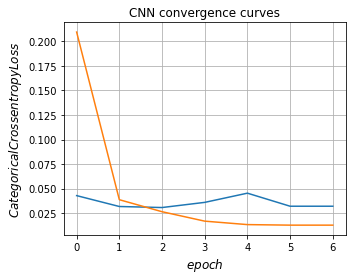

In [146]:

fig, axs = plt.subplots(figsize=(5,4), tight_layout=True)
plt.plot(history.history['val_loss'])
plt.plot( history.history['loss'])
plt.xlabel(r'$ epoch$', fontsize=12)
plt.ylabel(r'$  Categorical Crossentropy Loss $', fontsize=12)
plt.title('CNN convergence curves')
plt.grid(True)
plt.show()